In [1]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

In [2]:
Cagan_Adaptive = namedtuple("Cagan_Adaptive", 
                        ["α", "m0", "Eπ0", "T", "λ"])

def create_cagan_model(α, m0, Eπ0, T, λ):
    return Cagan_Adaptive(α, m0, Eπ0, T, λ)

In [3]:
# parameters
T = 80
T1 = 60
α = 5
λ = 0.9   # 0.7
m0 = 1

μ0 = 0.5
μ_star = 0

md = create_cagan_model(α=α, m0=m0, Eπ0=μ0, T=T, λ=λ)

In [4]:
def solve(model, μ_seq):
    " Solve the Cagan model in finite time. "
    
    model_params = model.α, model.m0, model.Eπ0, model.T, model.λ
    α, m0, Eπ0, T, λ = model_params
    
    A = np.eye(T+2, T+2) - λ*np.eye(T+2, T+2, k=-1)
    B = np.eye(T+2, T+1, k=-1)
    C = -α*np.eye(T+1, T+2) + α*np.eye(T+1, T+2, k=1)
    Eπ0_seq = np.append(Eπ0, np.zeros(T+1))

    # Eπ_seq is of length T+2
    Eπ_seq = np.linalg.inv(A - (1-λ)*B @ C) @ ((1-λ) * B @ μ_seq + Eπ0_seq)

    # π_seq is of length T+1
    π_seq = μ_seq + C @ Eπ_seq

    D = np.eye(T+1, T+1) - np.eye(T+1, T+1, k=-1)
    m0_seq = np.append(m0, np.zeros(T))

    # m_seq is of length T+2
    m_seq = np.linalg.inv(D) @ (μ_seq + m0_seq)
    m_seq = np.append(m0, m_seq)

    # p_seq is of length T+2
    p_seq = m_seq + α * Eπ_seq

    return π_seq, Eπ_seq, m_seq, p_seq

In [5]:
def solve_and_plot(model, μ_seq):
    
    π_seq, Eπ_seq, m_seq, p_seq = solve(model, μ_seq)
    
    T_seq = range(model.T+2)
    
    fig, ax = plt.subplots(5, 1, figsize=[5, 12], dpi=200)
    ax[0].plot(T_seq[:-1], μ_seq)
    ax[1].plot(T_seq[:-1], π_seq, label=r'$\pi_t$')
    ax[1].plot(T_seq, Eπ_seq, label=r'$\pi^{*}_{t}$')
    ax[2].plot(T_seq, m_seq - p_seq)
    ax[3].plot(T_seq, m_seq)
    ax[4].plot(T_seq, p_seq)
    
    y_labs = [r'$\mu$', r'$\pi$', r'$m - p$', r'$m$', r'$p$']

    for i in range(5):
        ax[i].set_xlabel(r'$t$')
        ax[i].set_ylabel(y_labs[i])

    ax[1].legend()
    plt.tight_layout()
    plt.show()
    
    return π_seq, Eπ_seq, m_seq, p_seq

In [6]:
print(np.abs((λ - α*(1-λ))/(1 - α*(1-λ))))

0.8


In [7]:
print(λ - α*(1-λ))

0.40000000000000013


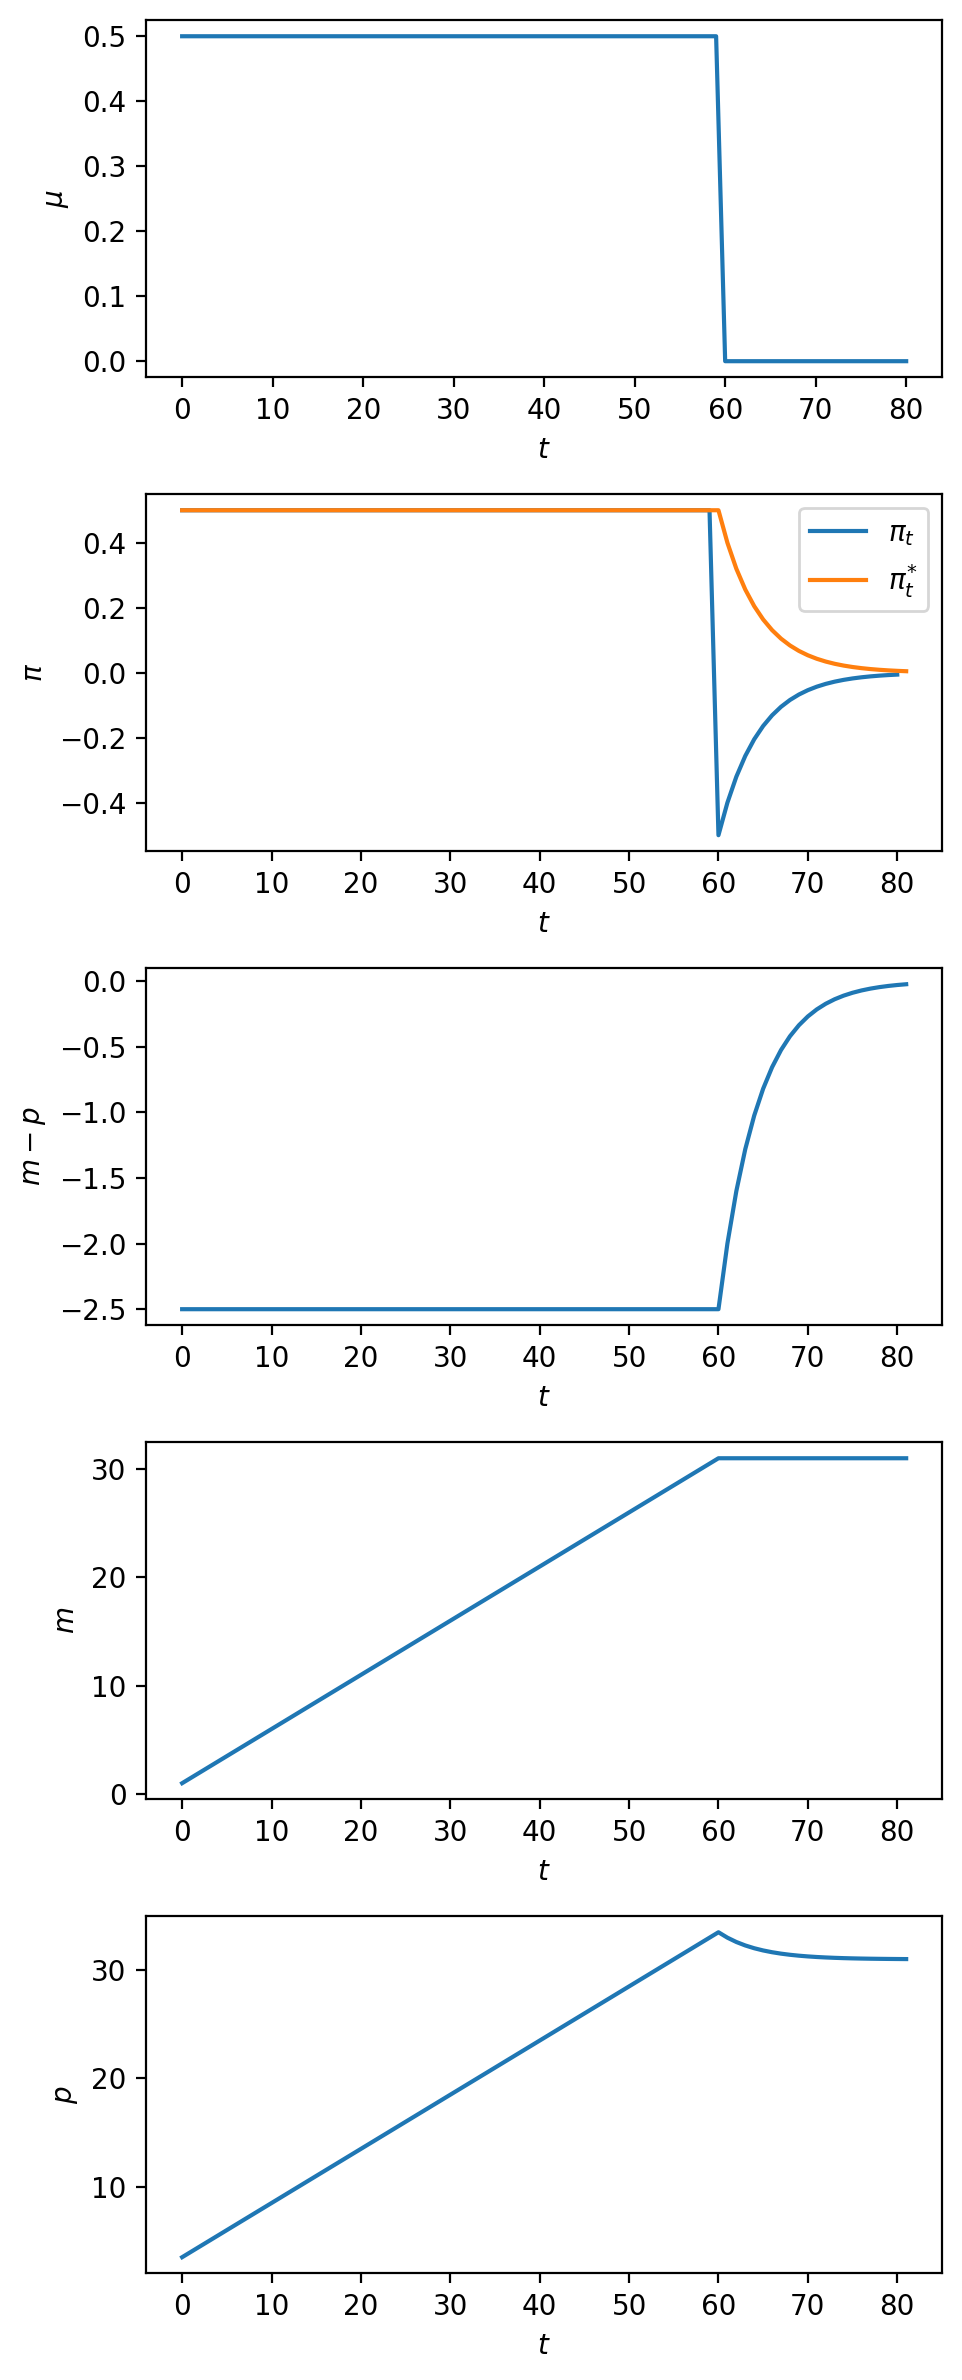

In [8]:
μ_seq_1 = np.append(μ0*np.ones(T1), μ_star*np.ones(T+1-T1))

# solve and plot
π_seq_1, Eπ_seq_1, m_seq_1, p_seq_1 = solve_and_plot(md, μ_seq_1)

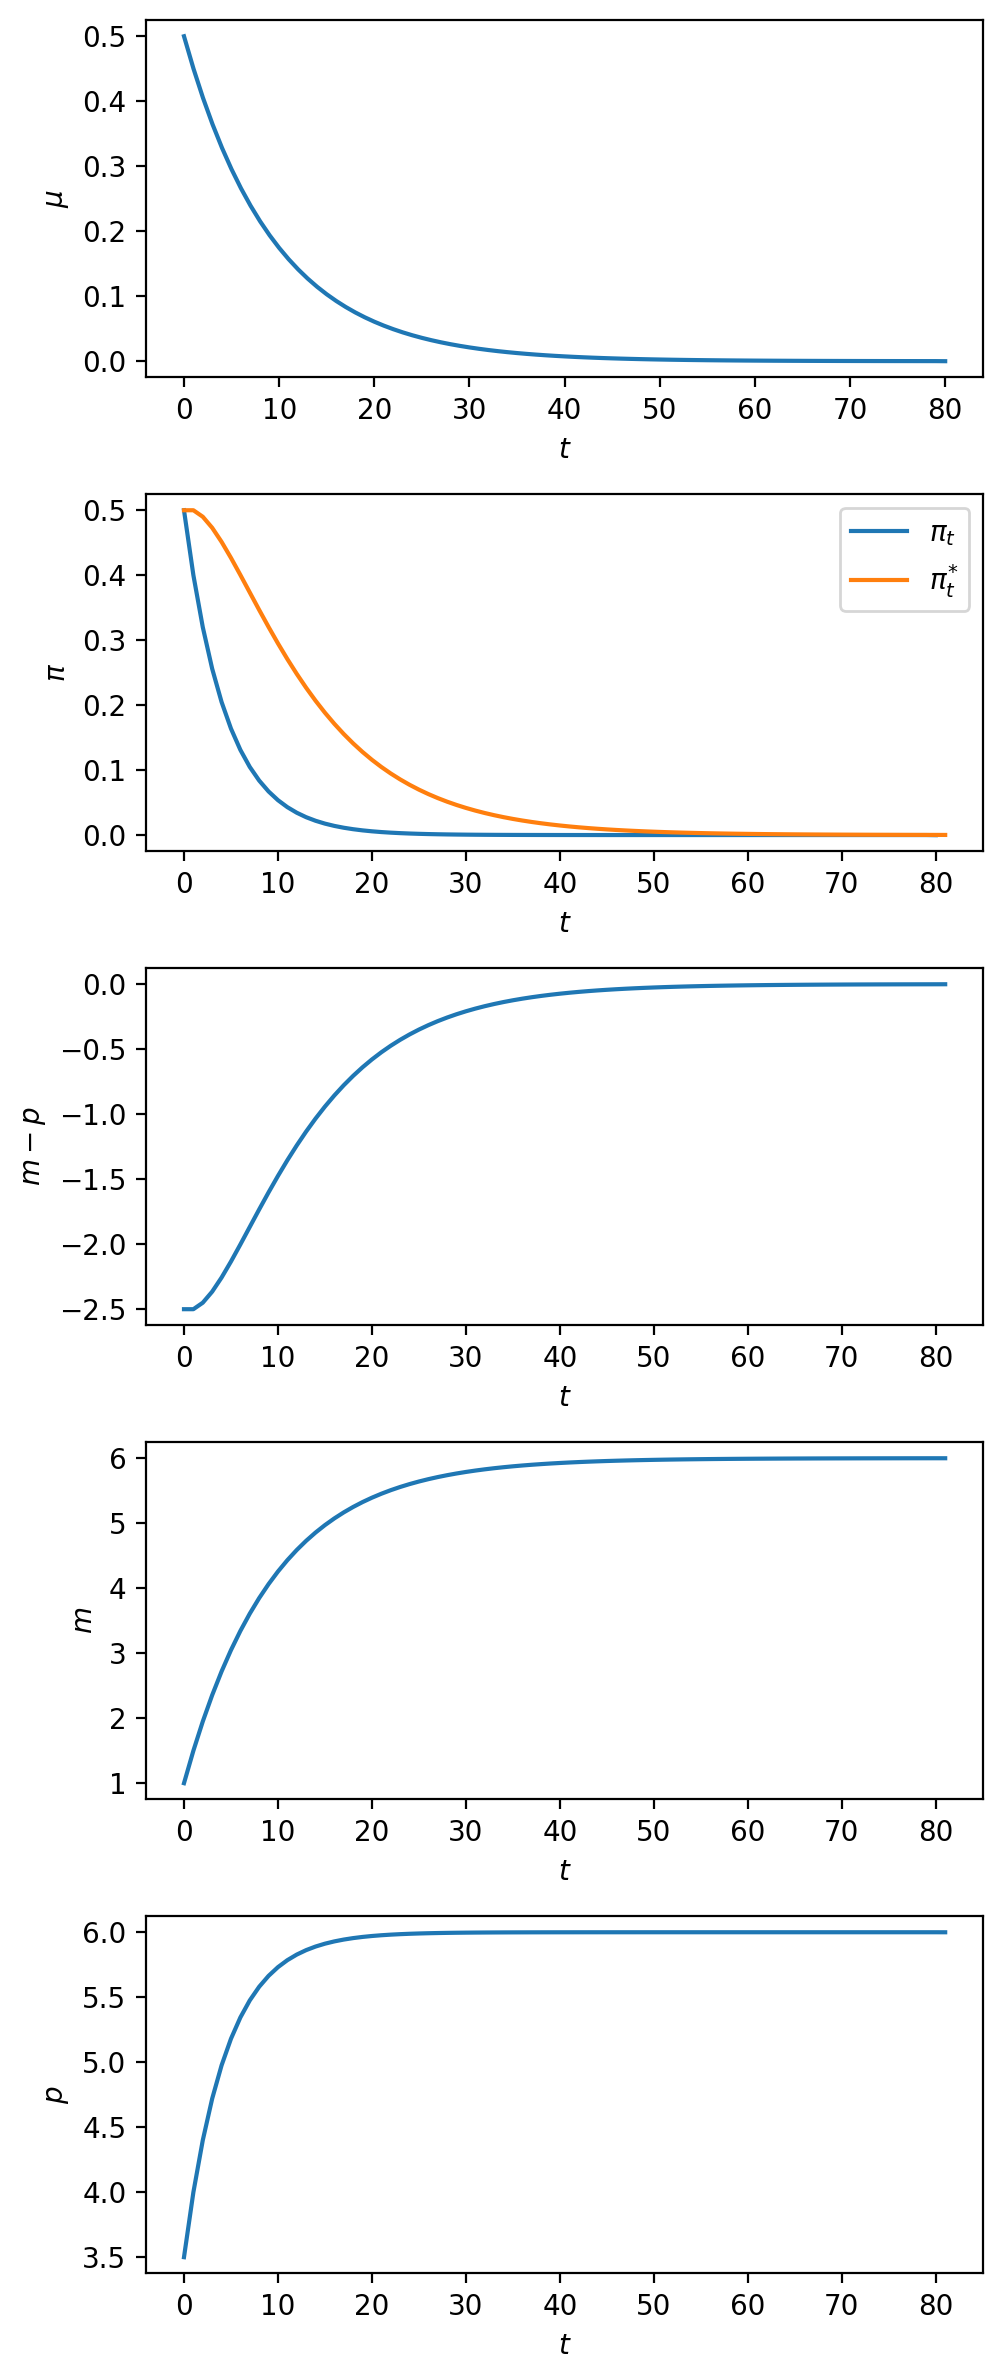

In [9]:
# parameters
ϕ = 0.9
μ_seq_2 = np.array([ϕ**t * μ0 + (1-ϕ**t)*μ_star for t in range(T)])
μ_seq_2 = np.append(μ_seq_2, μ_star)


# solve and plot
π_seq_2, Eπ_seq_2, m_seq_2, p_seq_2 = solve_and_plot(md, μ_seq_2)